In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

# Load CSV

In [2]:
X_train = pd.read_csv('./x_train_minmax_pca_97.csv')
X_train = shuffle(X_train)
y_train = X_train.iloc[:,-1]
X_train = X_train.drop('class',axis=1)

X_test = pd.read_csv('./x_test_minmax_pca_97.csv')
y_test = X_test.iloc[:,-1]
X_test = X_test.drop('class',axis=1)

In [3]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,786,787,788,789,790,791,792,793,794,795
2789,13.287567,-4.180306,14.377235,0.673594,3.627946,-2.390770,-1.712191,1.585448,1.241285,-2.879860,...,-0.125729,0.104276,-0.305436,-0.093603,0.056822,0.090002,0.136251,0.040818,0.081623,0.085125
3216,6.770210,12.890282,-8.020639,-3.647142,0.805590,-1.807976,-1.034888,-0.628998,-2.944534,1.892892,...,0.147628,-0.009304,-0.219030,0.006520,-0.043305,0.037583,-0.104130,-0.032128,0.065893,-0.035865
2063,-1.828611,-13.684523,5.199024,-9.624094,-4.374345,-0.092272,-4.412358,-4.536297,-1.542239,-7.370496,...,0.080060,0.124420,0.233778,0.027752,0.024571,0.129558,-0.041770,-0.075894,0.104417,-0.206279
2341,6.382314,4.338540,-2.042769,-4.341775,1.719186,0.159963,0.223397,0.222860,-1.499287,-2.585470,...,-0.039154,-0.420040,-0.270576,0.004325,-0.025851,0.055873,-0.031505,-0.041305,0.054169,-0.029417
3033,7.351010,10.312603,-10.771262,-3.691142,3.030546,-0.655544,3.684249,-0.930706,0.648103,-4.357490,...,-0.124508,0.202441,0.078776,-0.002325,0.010074,0.111184,-0.041874,-0.123013,0.354662,0.051020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,-1.871261,-10.615463,2.483176,-1.259055,6.677393,6.423196,0.418993,-1.056852,-0.653057,0.184942,...,0.090348,-0.000828,-0.140998,0.026114,0.238663,0.084268,0.131170,-0.016255,-0.068221,0.003243
1108,21.509198,1.240296,6.378385,2.639177,-1.776608,2.240362,-4.921393,1.108573,3.110468,5.293504,...,-0.184946,-0.380490,-0.176000,-0.208445,-0.258500,-0.037162,0.249668,-0.146676,-0.413438,0.255906
1001,4.656363,-2.095246,-4.496836,-5.081287,-2.405390,-1.680795,-1.622980,2.970796,1.314793,-2.074769,...,0.081225,0.065187,-0.001557,0.064854,0.074368,-0.040408,0.123602,0.056694,-0.152787,-0.079117
1554,-5.286232,-5.123122,-0.200314,-2.808654,-4.004364,-1.371789,-2.811417,-0.258015,0.971283,4.759483,...,-0.016720,-0.052466,-0.143166,-0.186470,-0.090572,0.160962,-0.180943,0.117821,-0.133019,-0.065400


# RF-Hyperparameter Tune

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [14]:
np.sum(y_test == y_pred_rf) / len(y_test)

0.7232142857142857

In [26]:
RF_classifier = RandomForestClassifier()
parameters = [{'n_estimators':[280,300],
               'max_depth': list(range(6,8,2)),
               'criterion':['entropy'],                 
               'min_samples_split':[9,10],
               'max_features':['auto'],
               'min_samples_leaf':[2]
               }]

In [27]:
grid_search = GridSearchCV(estimator = RF_classifier,
                           param_grid= parameters,
                           scoring = 'accuracy',
                           refit=True,
                           verbose = 3,
                           return_train_score = True)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=280;, score=(train=0.960, test=0.719) total time=  10.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=280;, score=(train=0.955, test=0.695) total time=  10.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=280;, score=(train=0.952, test=0.702) total time=  10.3s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=280;, score=(train=0.949, test=0.758) total time=  10.3s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, n_estimators=280;, score=(train=0.958, test=0.712) total time=  10.4s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, m

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy'], 'max_depth': [6],
                          'max_features': ['auto'], 'min_samples_leaf': [2],
                          'min_samples_split': [9, 10],
                          'n_estimators': [280, 300]}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [28]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 72.49 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 280}


In [22]:
print(grid_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=300)


In [29]:
result = pd.DataFrame(grid.cv_results_)[['mean_fit_time','params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

,mean_fit_time,params,mean_test_score,rank_test_score
1,0.015851,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.779300,1
5,0.013371,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.740902,2
0,0.013680,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.712235,3
9,0.012282,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.709084,4
7,0.013433,"{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}",0.703066,5


In [30]:
grid_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, grid_pred)

print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[20 16  4]
 [10 30  0]
 [ 3  2 27]]
              precision    recall  f1-score   support

       happy       0.61      0.50      0.55        40
         sad       0.62      0.75      0.68        40
       angry       0.87      0.84      0.86        32

    accuracy                           0.69       112
   macro avg       0.70      0.70      0.70       112
weighted avg       0.69      0.69      0.68       112



[Text(0, 0.5, 'happy'), Text(0, 1.5, 'sad'), Text(0, 2.5, 'angry')]

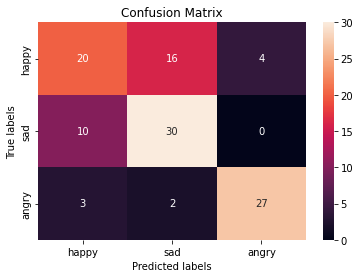

In [31]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['happy', 'sad', 'angry']); ax.yaxis.set_ticklabels(['happy', 'sad', 'angry'])

----------
# Knn

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
# prepare a range of alpha values to test
param_grid = {'n_neighbors':list(range(1,30)) , 'weights': ['uniform'] , 'p':[1,2]}   #,'distance'
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

In [7]:
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 77.93 %
Best Parameters: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [13]:
result = pd.DataFrame(grid.cv_results_)[['mean_fit_time','params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

,mean_fit_time,params,mean_test_score,rank_test_score
1,0.015851,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.779300,1
5,0.013371,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.740902,2
0,0.013680,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.712235,3
9,0.012282,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.709084,4
7,0.013433,"{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}",0.703066,5


In [8]:
result = pd.DataFrame(grid.cv_results_)#[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.015851,0.003150,0.077238,0.008363,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.783668,0.770774,...,0.779300,0.013702,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.013371,0.001012,0.083997,0.009938,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.757880,0.730659,...,0.740902,0.013978,2,0.869939,0.881405,0.881405,0.872089,0.873567,0.875681,0.004814


In [32]:
model = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', p = 2)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score)
cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.7321428571428571


In [33]:
#grid_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[32  8  0]
 [12 26  2]
 [ 8  0 24]]
              precision    recall  f1-score   support

       happy       0.61      0.50      0.55        40
         sad       0.62      0.75      0.68        40
       angry       0.87      0.84      0.86        32

    accuracy                           0.69       112
   macro avg       0.70      0.70      0.70       112
weighted avg       0.69      0.69      0.68       112



[Text(0, 0.5, 'happy'), Text(0, 1.5, 'sad'), Text(0, 2.5, 'angry')]

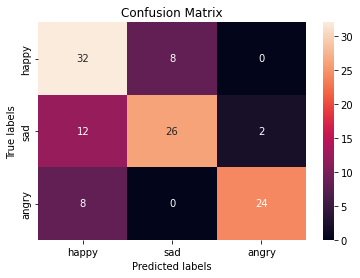

In [34]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['happy', 'sad', 'angry']); ax.yaxis.set_ticklabels(['happy', 'sad', 'angry'])

In [14]:
#grid_pred = grid.best_estimator_.predict(X_test)
# overfitting
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['happy', 'sad', 'angry']))

Confusion Matrix : 
 [[36  4  0]
 [12 27  1]
 [ 8  1 23]]
              precision    recall  f1-score   support

       happy       0.64      0.90      0.75        40
         sad       0.84      0.68      0.75        40
       angry       0.96      0.72      0.82        32

    accuracy                           0.77       112
   macro avg       0.81      0.76      0.77       112
weighted avg       0.80      0.77      0.77       112



[Text(0, 0.5, 'happy'), Text(0, 1.5, 'sad'), Text(0, 2.5, 'angry')]

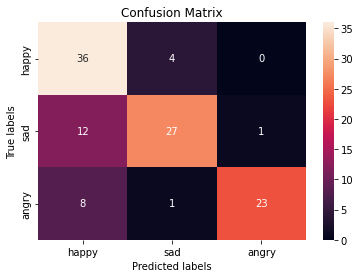

In [16]:
# overfitting
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['happy', 'sad', 'angry']); ax.yaxis.set_ticklabels(['happy', 'sad', 'angry'])